Ship Performence Clustering

Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import Dataset

In [2]:
df=pd.read_csv(r"D:\Data Science With Python\dataset\Large data\Ship_Performance_Dataset.csv",)
df.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


In [3]:
df.shape

(2736, 18)

Feature Engineering

In [4]:
df.isnull().sum()[df.isnull().sum()>0]

Ship_Type             136
Route_Type            136
Engine_Type           136
Maintenance_Status    136
Weather_Condition     136
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="most_frequent")
df['Ship_Type']=si.fit_transform(df[['Ship_Type']]).ravel()
df['Route_Type']=si.fit_transform(df[['Route_Type']]).ravel()
df['Engine_Type']=si.fit_transform(df[['Engine_Type']]).ravel()
df['Maintenance_Status']=si.fit_transform(df[['Maintenance_Status']]).ravel()
df['Weather_Condition']=si.fit_transform(df[['Weather_Condition']]).ravel()
df.isnull().sum()

Date                       0
Ship_Type                  0
Route_Type                 0
Engine_Type                0
Maintenance_Status         0
Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Draft_meters               0
Weather_Condition          0
Cargo_Weight_tons          0
Operational_Cost_USD       0
Revenue_per_Voyage_USD     0
Turnaround_Time_hours      0
Efficiency_nm_per_kWh      0
Seasonal_Impact_Score      0
Weekly_Voyage_Count        0
Average_Load_Percentage    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df[['Speed_Over_Ground_knots','Distance_Traveled_nm','Operational_Cost_USD','Revenue_per_Voyage_USD']].corr()
#I want Clustering using these columns because these are have relationship itself

,Speed_Over_Ground_knots,Distance_Traveled_nm,Operational_Cost_USD,Revenue_per_Voyage_USD
Speed_Over_Ground_knots,1.000000,-0.010198,-0.035825,0.002370
Distance_Traveled_nm,-0.010198,1.000000,0.002468,0.040388
Operational_Cost_USD,-0.035825,0.002468,1.000000,0.023865
Revenue_per_Voyage_USD,0.002370,0.040388,0.023865,1.000000


In [8]:
df[['Speed_Over_Ground_knots','Distance_Traveled_nm','Operational_Cost_USD','Revenue_per_Voyage_USD']].describe()

,Speed_Over_Ground_knots,Distance_Traveled_nm,Operational_Cost_USD,Revenue_per_Voyage_USD
count,2736.000000,2736.000000,2736.000000,2736.000000
mean,17.602863,1036.406203,255143.344488,521362.062011
std,4.311979,568.632080,140890.482189,271211.625499
min,10.009756,50.433150,10092.306318,50351.814447
25%,13.928452,548.511573,131293.378767,290346.388017
50%,17.713757,1037.816060,257157.653226,520176.931762
75%,21.284785,1540.934161,381796.930499,750072.791216
max,24.997043,1998.337057,499734.867868,999916.696140


In [9]:
df_backup=df.copy()
# I backup my data due row deleting issues
df[['Speed_Over_Ground_knots','Distance_Traveled_nm','Operational_Cost_USD','Revenue_per_Voyage_USD']].describe()
# i am tried to delete outliers in these columns .But my all rows will gone.


,Speed_Over_Ground_knots,Distance_Traveled_nm,Operational_Cost_USD,Revenue_per_Voyage_USD
count,2736.000000,2736.000000,2736.000000,2736.000000
mean,17.602863,1036.406203,255143.344488,521362.062011
std,4.311979,568.632080,140890.482189,271211.625499
min,10.009756,50.433150,10092.306318,50351.814447
25%,13.928452,548.511573,131293.378767,290346.388017
50%,17.713757,1037.816060,257157.653226,520176.931762
75%,21.284785,1540.934161,381796.930499,750072.791216
max,24.997043,1998.337057,499734.867868,999916.696140


Exploratory Data Analysis(EDA)

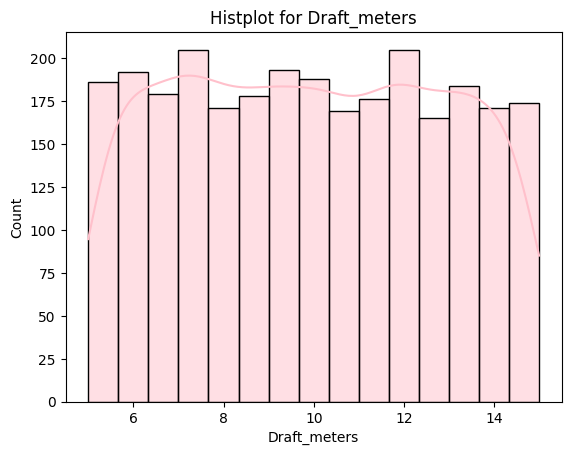

In [10]:
sns.histplot(x=df['Draft_meters'],kde=True,color='pink')
plt.title("Histplot for Draft_meters")
plt.show()
#I tried all int columns but no one is perfect normal distribution like "bell curve"

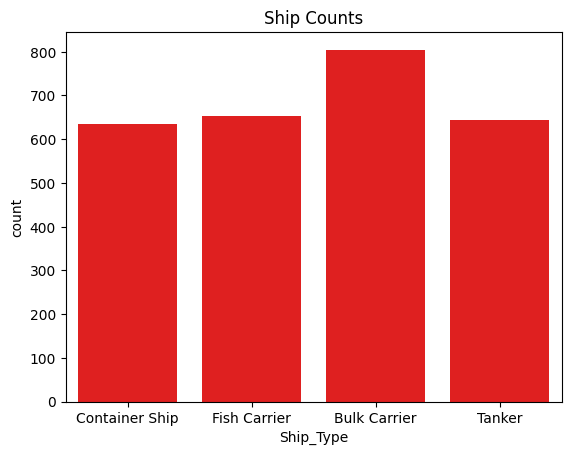

In [11]:
sns.countplot(x=df['Ship_Type'],color='red')
plt.title("Ship Counts")
plt.show()
#Bulk carrier type ship is comparatively higher than other ships

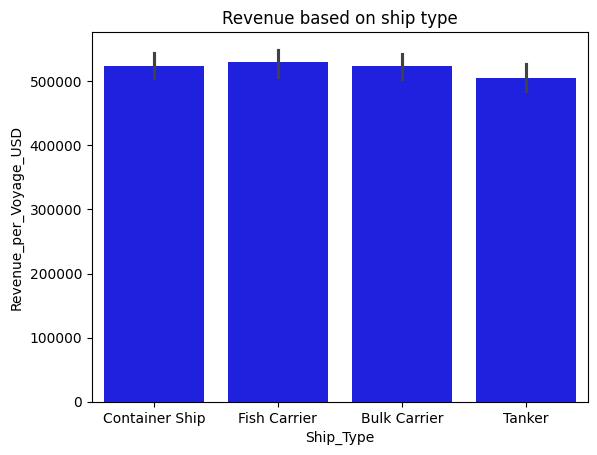

In [12]:
sns.barplot(x=df['Ship_Type'],y=df['Revenue_per_Voyage_USD'],color='blue')
plt.title("Revenue based on ship type")
plt.show()
#Comparatively tanker ship gives less revenue

In [13]:
df['Engine_Type'].unique()

array(['Heavy Fuel Oil (HFO)', 'Steam Turbine', 'Diesel'], dtype=object)

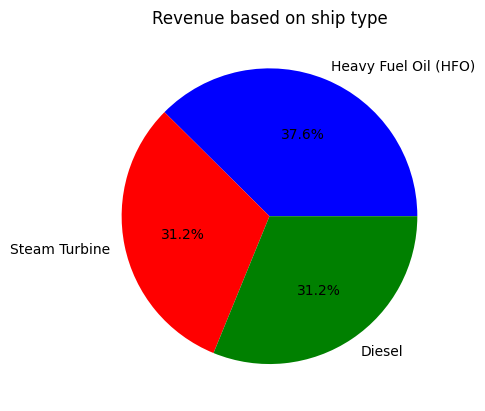

In [14]:
pie=df['Engine_Type'].value_counts()
plt.pie(pie,labels=['Heavy Fuel Oil (HFO)', 'Steam Turbine', 'Diesel'],autopct='%1.1f%%',colors=['blue','red','green'])
plt.title("Revenue based on ship type")
plt.show()
#Most of the ships have heavy fuel oil

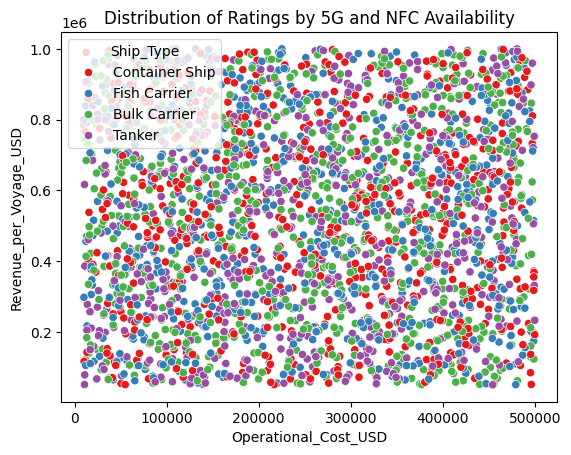

In [15]:
sns.scatterplot(data=df,x='Operational_Cost_USD',y='Revenue_per_Voyage_USD',palette='Set1',hue='Ship_Type')
plt.title('Distribution of Ratings by 5G and NFC Availability')
plt.show()

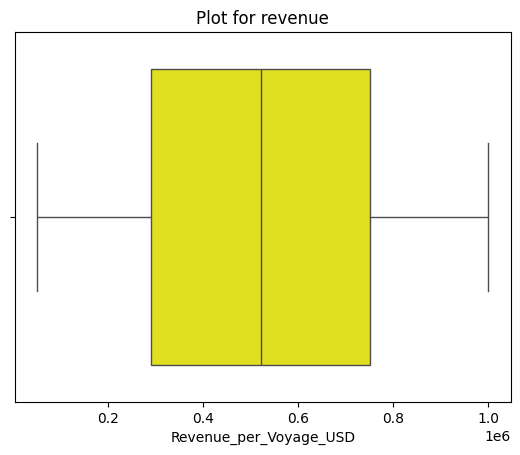

In [16]:
sns.boxplot(x=df['Revenue_per_Voyage_USD'],color='yellow')
plt.title("Plot for revenue")
plt.show()

Standardization 

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
obj=['Date', 'Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status',
       'Weather_Condition']
for i in obj:
    df[i]=le.fit_transform(df[i].astype(str))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   int64  
 1   Ship_Type                2736 non-null   int64  
 2   Route_Type               2736 non-null   int64  
 3   Engine_Type              2736 non-null   int64  
 4   Maintenance_Status       2736 non-null   int64  
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2736 non-null   int64  
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [18]:
x=df[['Speed_Over_Ground_knots','Distance_Traveled_nm']]

In [19]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
st.fit_transform(x)

array([[-1.16100314, -0.0096083 ],
       [-1.67361736,  0.0423553 ],
       [ 0.72993369, -0.66405165],
       ...,
       [-0.18304695,  0.59813119],
       [ 1.28265711, -0.73377169],
       [-1.40909487,  1.57218173]], shape=(2736, 2))

In [20]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
st.fit_transform(df)

array([[-1.70192589, -0.36335472, -0.41953222, ...,  1.42900788,
        -1.50734649,  1.2786495 ],
       [-1.64114282,  0.51331064,  0.49727302, ..., -0.41002457,
         0.41782389,  1.28734312],
       [-1.58035975, -0.36335472, -0.41953222, ...,  1.39486426,
         1.57292613,  1.44745821],
       ...,
       [ 1.58035975, -0.36335472,  0.49727302, ..., -0.96604362,
         0.41782389,  0.39676311],
       [ 1.64114282,  1.38997601,  1.41407826, ..., -0.34995325,
        -1.12231241,  1.21553546],
       [ 1.70192589,  0.51331064, -1.33633747, ...,  0.99024888,
        -1.12231241, -0.62234008]], shape=(2736, 18))

KMeans Clustering 

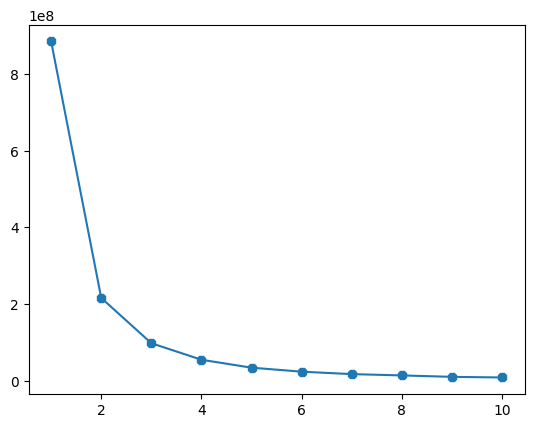

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

x=df[['Speed_Over_Ground_knots','Distance_Traveled_nm']]
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, marker ="8")
plt.show()
# Inertia = sum of squared distances of each sample to its nearest cluster center
# WCSS (Within-Cluster Sum of Squares)=) is the total squared distance between each data point and the centroid of the cluster it belongs to.

In [22]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
kmeans_elbow=kl.elbow
print("elbow=",kmeans_elbow)
a=km.inertia_
print('inertia=',a)
kmeans=KMeans(n_clusters=3, random_state=0)
y_means = kmeans.fit_predict(x)
b=y_means_center=kmeans.cluster_centers_
b

elbow= 3
inertia= 8783314.019796265


array([[  17.55128515, 1683.57240696],
       [  17.64696767,  381.42894416],
       [  17.61154626, 1033.54431519]])

In [23]:
from sklearn.metrics import silhouette_score
s=silhouette_score(x,kmeans.labels_,metric="manhattan",sample_size=20)
print(s)
# This silhouette score will change whenever i run this cell

0.5246099079665383


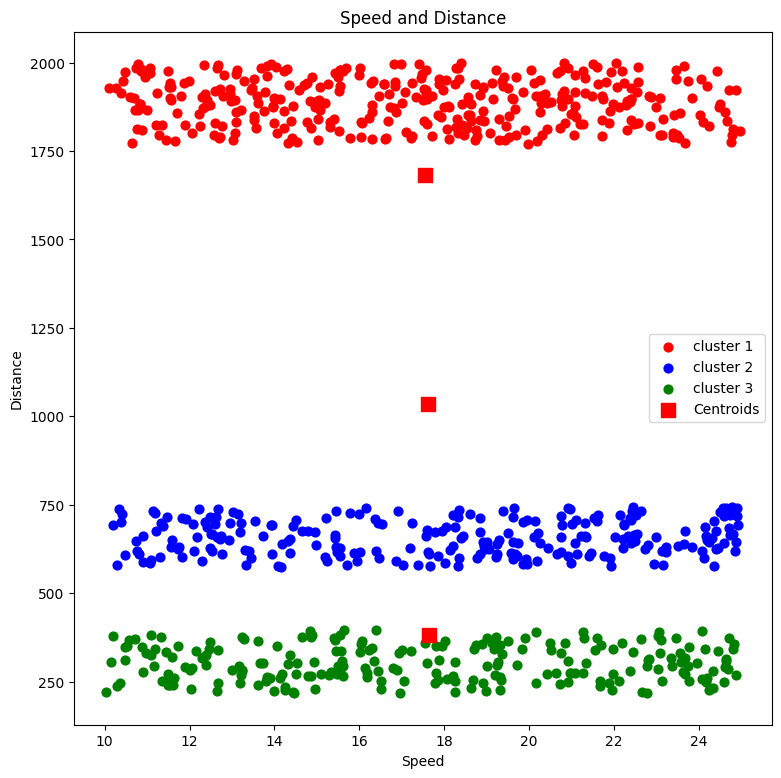

In [24]:
plt.figure(figsize=(9,9))
x=df[['Speed_Over_Ground_knots','Distance_Traveled_nm']]
plt.scatter(x[km.labels_==0]['Speed_Over_Ground_knots'],x[km.labels_==0]['Distance_Traveled_nm'],s=40,c='red',label='cluster 1')
plt.scatter(x[km.labels_==1]['Speed_Over_Ground_knots'],x[km.labels_==1]['Distance_Traveled_nm'],s=40,c='blue',label='cluster 2')
plt.scatter(x[km.labels_==2]['Speed_Over_Ground_knots'],x[km.labels_==2]['Distance_Traveled_nm'],s=40,c='green',label='cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100,marker='s', c='red', label='Centroids')
plt.title("Speed and Distance")
plt.xlabel("Speed")
plt.ylabel("Distance")
plt.legend()
plt.show()

In [25]:
y=df[['Operational_Cost_USD','Revenue_per_Voyage_USD']]

In [26]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
st.fit_transform(y)

array([[ 1.62346534, -0.84517278],
       [ 1.62031086,  1.3364839 ],
       [ 1.37294876, -0.4696207 ],
       ...,
       [-1.25127155, -1.059299  ],
       [-1.6320749 ,  1.0265141 ],
       [-1.41966055, -0.51317667]], shape=(2736, 2))

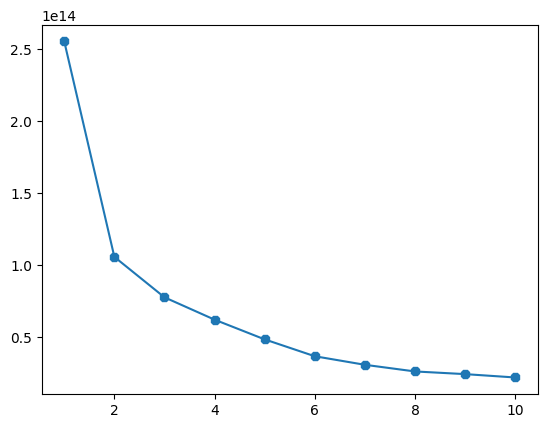

In [27]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

y=df[['Operational_Cost_USD','Revenue_per_Voyage_USD']]
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',random_state=0)
    km.fit(y)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, marker ="8")
plt.show()

In [28]:
from kneed import KneeLocator
k2=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
kmeans_elbow=k2.elbow
print("elbow=",kmeans_elbow)
a=km.inertia_
print('inertia=',a)
kmeans=KMeans(n_clusters=3, random_state=0)
y_means = kmeans.fit_predict(y)
b=y_means_center=kmeans.cluster_centers_
b

elbow= 3
inertia= 21728356203306.83


array([[260596.29832935, 528073.8393769 ],
       [248092.29054574, 211484.20335762],
       [256716.9087019 , 841039.76791011]])

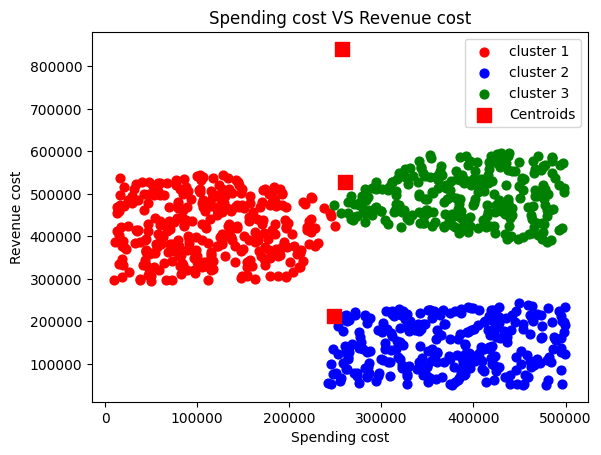

In [29]:
y=df[['Operational_Cost_USD', 'Revenue_per_Voyage_USD']]
plt.scatter(y[km.labels_==0]['Operational_Cost_USD'],y[km.labels_==0]['Revenue_per_Voyage_USD'],s=40,c='red',label='cluster 1')
plt.scatter(y[km.labels_==1]['Operational_Cost_USD'],y[km.labels_==1]['Revenue_per_Voyage_USD'],s=40,c='blue',label='cluster 2')
plt.scatter(y[km.labels_==2]['Operational_Cost_USD'],y[km.labels_==2]['Revenue_per_Voyage_USD'],s=40,c='green',label='cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100,marker='s', c='red', label='Centroids')
plt.title("Spending cost VS Revenue cost")
plt.xlabel("Spending cost")
plt.ylabel("Revenue cost")
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import silhouette_score
s=silhouette_score(x,kmeans.labels_,metric="euclidean",sample_size=20,)
print(s)

-0.2396348916599636


Hierarchical Clustering

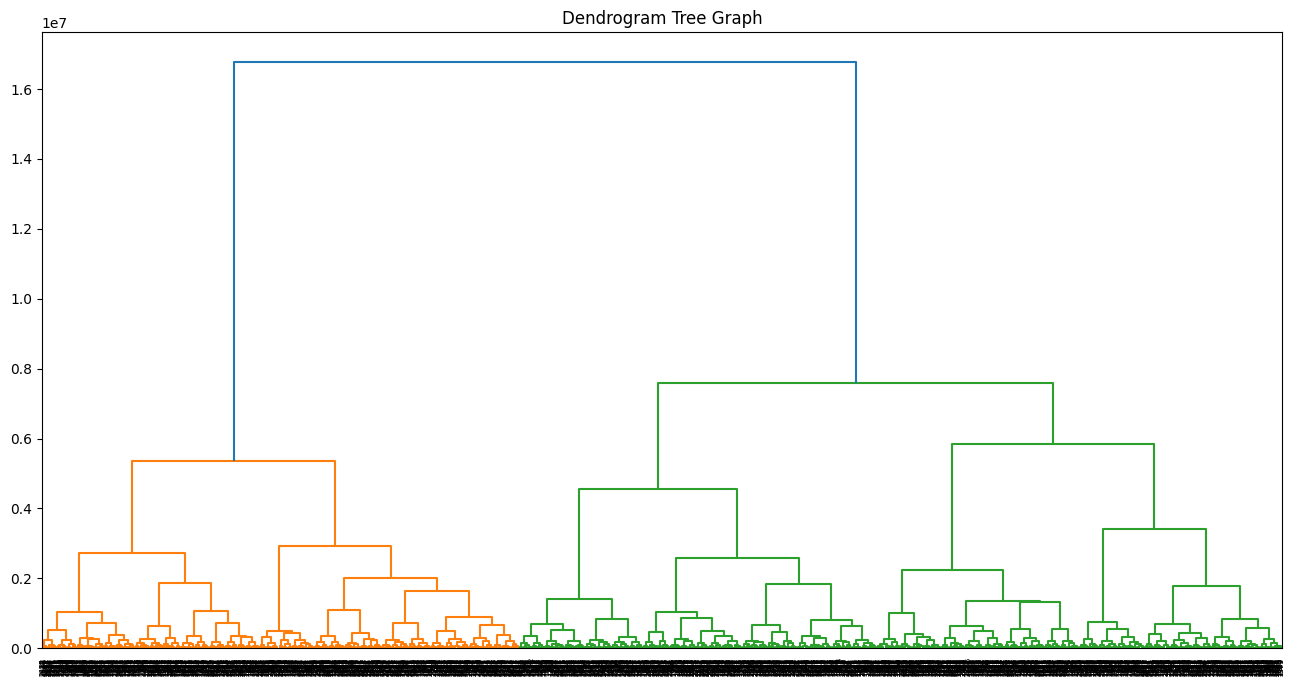

In [31]:
import scipy.cluster.hierarchy as clus

plt.figure(figsize = (16 ,8))
dendrogram = clus.dendrogram(clus.linkage(df, method  = "ward"))

plt.title('Dendrogram Tree Graph')
plt.show()

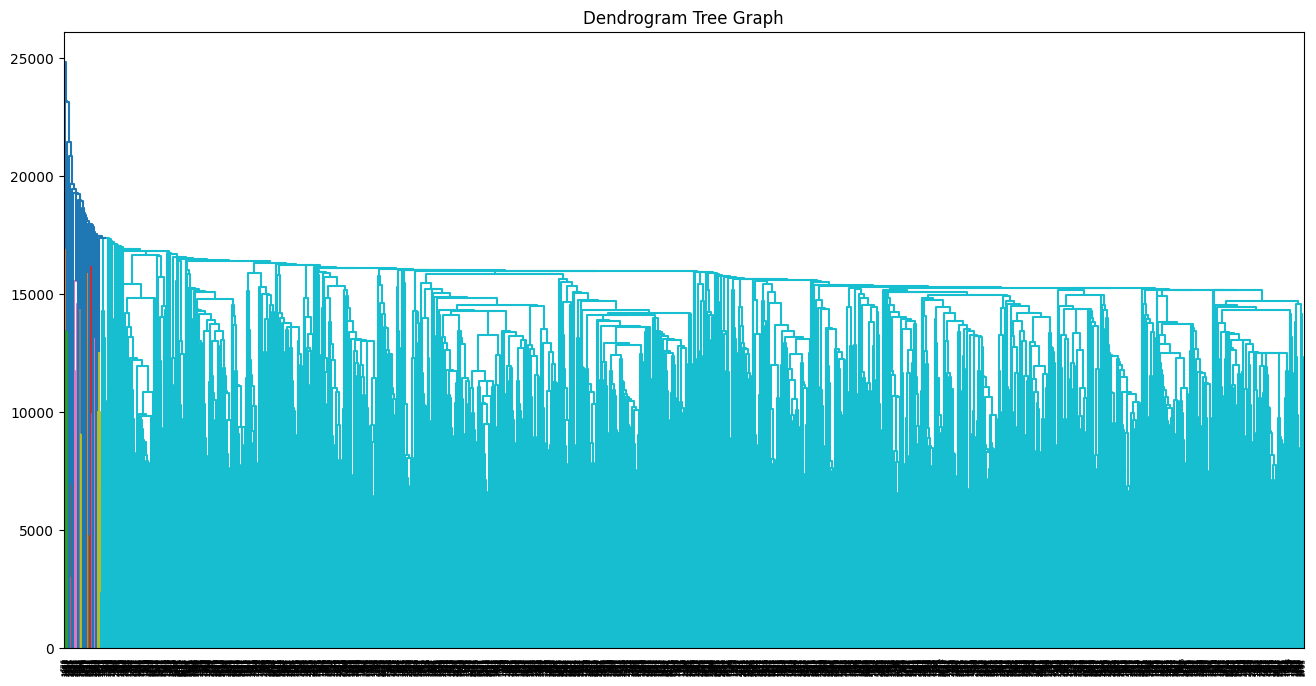

In [32]:
import scipy.cluster.hierarchy as clus

plt.figure(figsize = (16 ,8))
dendrogram = clus.dendrogram(clus.linkage(df, method  = "single"))

plt.title('Dendrogram Tree Graph')
plt.show()

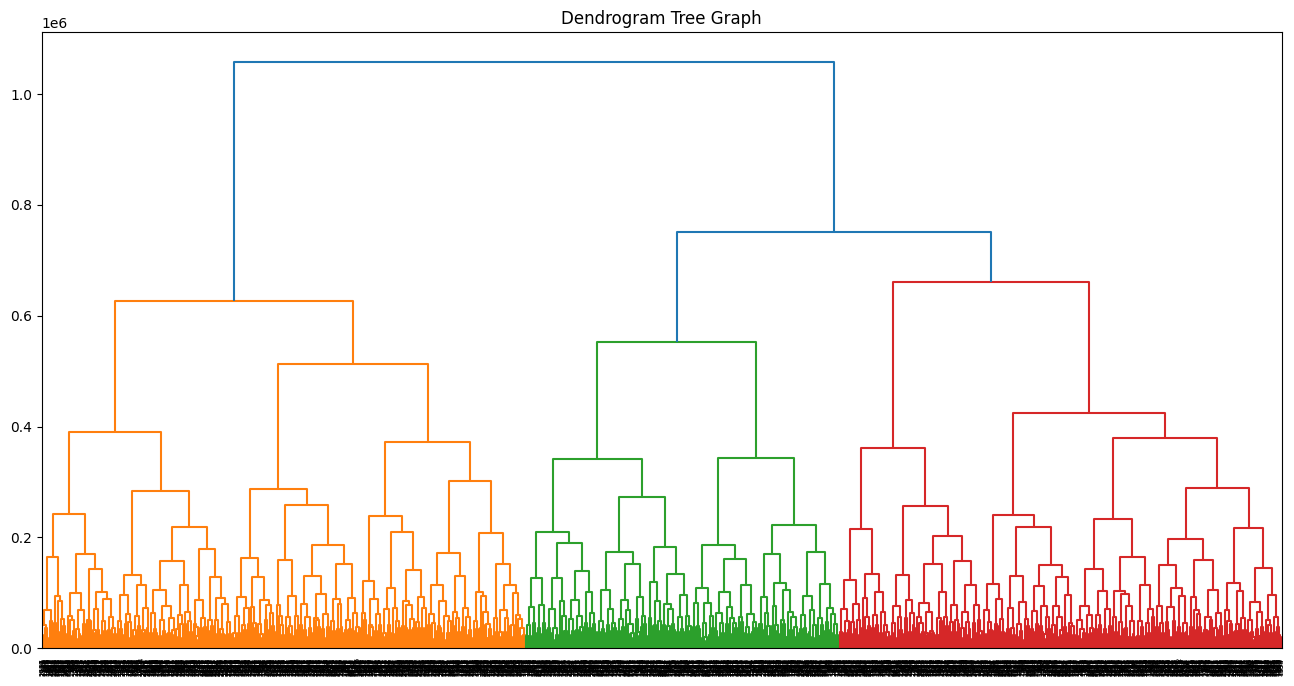

In [33]:
import scipy.cluster.hierarchy as clus

plt.figure(figsize = (16 ,8))
dendrogram = clus.dendrogram(clus.linkage(df, method  = "complete"))

plt.title('Dendrogram Tree Graph')
plt.show()

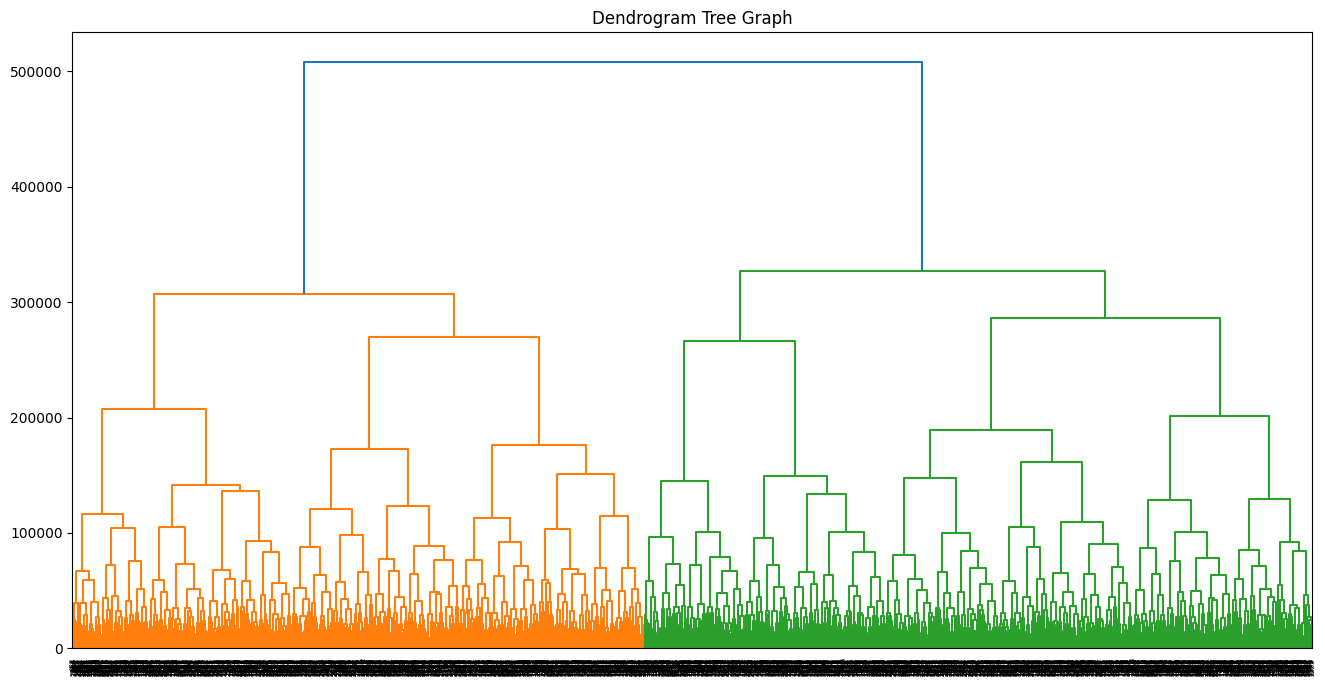

In [34]:
import scipy.cluster.hierarchy as clus

plt.figure(figsize = (16 ,8))
dendrogram = clus.dendrogram(clus.linkage(df, method  = "average"))

plt.title('Dendrogram Tree Graph')
plt.show()

I take **Average** and **Ward** 

*For Average*

In [35]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 5, linkage ='average')
y_means = model.fit_predict(df)
y_means

array([0, 2, 0, ..., 1, 3, 1], shape=(2736,))

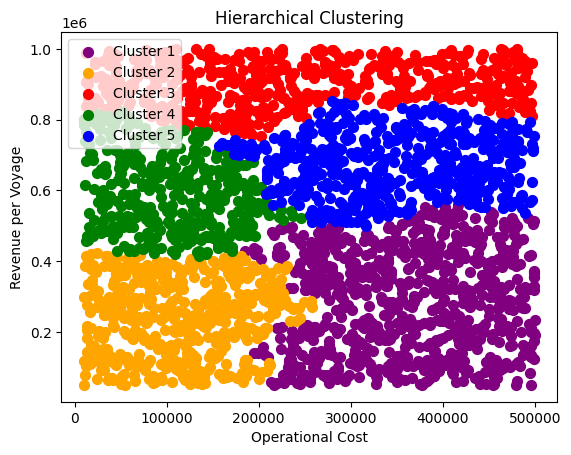

In [36]:
#x=Operational_Cost_USD,Revenue_per_Voyage_USD
X = df.iloc[:, [11,12]].values
plt.scatter(X[y_means==0, 0], X[y_means==0, 1], s=50, c='purple', label ='Cluster 1')
plt.scatter(X[y_means==1, 0], X[y_means==1, 1], s=50, c='orange', label ='Cluster 2')
plt.scatter(X[y_means==2, 0], X[y_means==2, 1], s=50, c='red', label ='Cluster 3')
plt.scatter(X[y_means==3, 0], X[y_means==3, 1], s=50, c='green', label ='Cluster 4')
plt.scatter(X[y_means==4, 0], X[y_means==4, 1], s=50, c='blue', label ='Cluster 5')
plt.title('Hierarchical Clustering')
plt.xlabel('Operational Cost')
plt.ylabel('Revenue per Voyage')
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import silhouette_score
s=silhouette_score(x,kmeans.labels_,metric="euclidean",sample_size=20,)
print(s)

-0.04657822716874397


*For Ward*

In [38]:
from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(n_clusters = 8, linkage ='ward')
y_means = ward.fit_predict(df)
y_means

array([0, 6, 5, ..., 4, 3, 4], shape=(2736,))

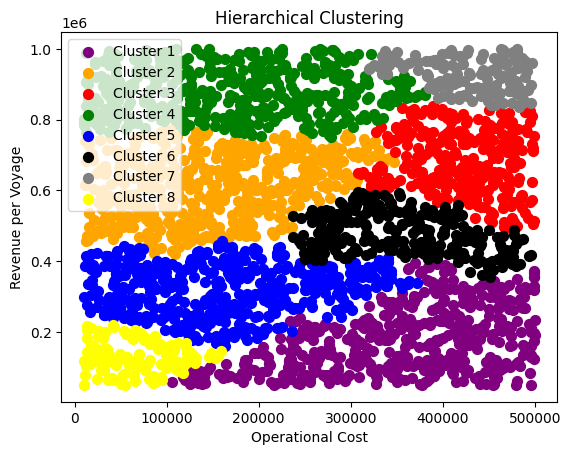

In [39]:
X = df.iloc[:, [11,12]].values
plt.scatter(X[y_means==0, 0], X[y_means==0, 1], s=50, c='purple', label ='Cluster 1')
plt.scatter(X[y_means==1, 0], X[y_means==1, 1], s=50, c='orange', label ='Cluster 2')
plt.scatter(X[y_means==2, 0], X[y_means==2, 1], s=50, c='red', label ='Cluster 3')
plt.scatter(X[y_means==3, 0], X[y_means==3, 1], s=50, c='green', label ='Cluster 4')
plt.scatter(X[y_means==4, 0], X[y_means==4, 1], s=50, c='blue', label ='Cluster 5')
plt.scatter(X[y_means==5, 0], X[y_means==5, 1], s=50, c='black', label ='Cluster 6')
plt.scatter(X[y_means==6, 0], X[y_means==6, 1], s=50, c='gray', label ='Cluster 7')
plt.scatter(X[y_means==7, 0], X[y_means==7, 1], s=50, c='yellow', label ='Cluster 8')
plt.title('Hierarchical Clustering')
plt.xlabel('Operational Cost')
plt.ylabel('Revenue per Voyage')
plt.legend()
plt.show()

Clustering Finished Succesfully